# Clustering of Factor Analysis Results

In [96]:
library(readxl)
library(tidyverse) #data Manipulation
library(magrittr)
library(cluster) #Clustering algorithms
#install.packages('cluster.datasets')
library(cluster.datasets)
library(cowplot)
#install.packages('clValid')
library(clValid)
#install.packages('ggfortify')
library(ggfortify)
#install.packages('clustree')
library(clustree)
library(factoextra)#Clustering Algorithms & Visualization
library(FactoMineR)
library(gridExtra)
library(corrplot)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)
#install.packages('writexl')
library(writexl)
library(GGally)
#install.packages('ggiraphExtra')
library(ggiraphExtra)
library(knitr)
library(kableExtra)
library("RColorBrewer")

install.packages('clusterSim')
library(clusterSim)

Warning message:
"package 'clusterSim' is in use and will not be installed"


Country,ML1,ML6,ML3,ML5,ML2,ML7,ML4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.572418217,0.27948505,0.4740642,0.48905269,0.3327190,0.6406390,0.5244550
Albania,0.173347287,0.16631234,0.7812555,0.21604457,0.3179487,0.2668756,0.5813036
Angola,0.555402896,0.26567935,0.6221088,0.51799504,0.4010244,0.8739405,0.4280040
Armenia,0.006249719,0.01802207,0.9992766,0.05567089,0.0000000,0.1978413,0.5088645
Azerbaijan,0.172305543,0.17209406,0.6946237,0.41693952,0.2060016,0.4634648,0.4247652
Bangladesh,0.116506831,0.08746231,0.0000000,0.29168400,0.1829046,0.1907371,0.5876124
Benin,0.637942432,0.21134166,0.4559905,0.49267200,0.2827230,0.4847495,0.6788342


   Country               ML1              ML6              ML3        
 Length:73          Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.1733   1st Qu.:0.1649   1st Qu.:0.4645  
 Mode  :character   Median :0.4295   Median :0.2146   Median :0.5688  
                    Mean   :0.3889   Mean   :0.2571   Mean   :0.5841  
                    3rd Qu.:0.5554   3rd Qu.:0.3083   3rd Qu.:0.7118  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      ML5              ML2              ML7              ML4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3541   1st Qu.:0.2178   1st Qu.:0.2499   1st Qu.:0.4500  
 Median :0.4891   Median :0.2774   Median :0.3684   Median :0.5759  
 Mean   :0.4636   Mean   :0.2970   Mean   :0.3939   Mean   :0.5628  
 3rd Qu.:0.5929   3rd Qu.:0.3286   3rd Qu.:0.5159   3rd Qu.:0.6788  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 3 as the best number of clusters 
* 4 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 
* 10 proposed 7 as the best number

png 
  2

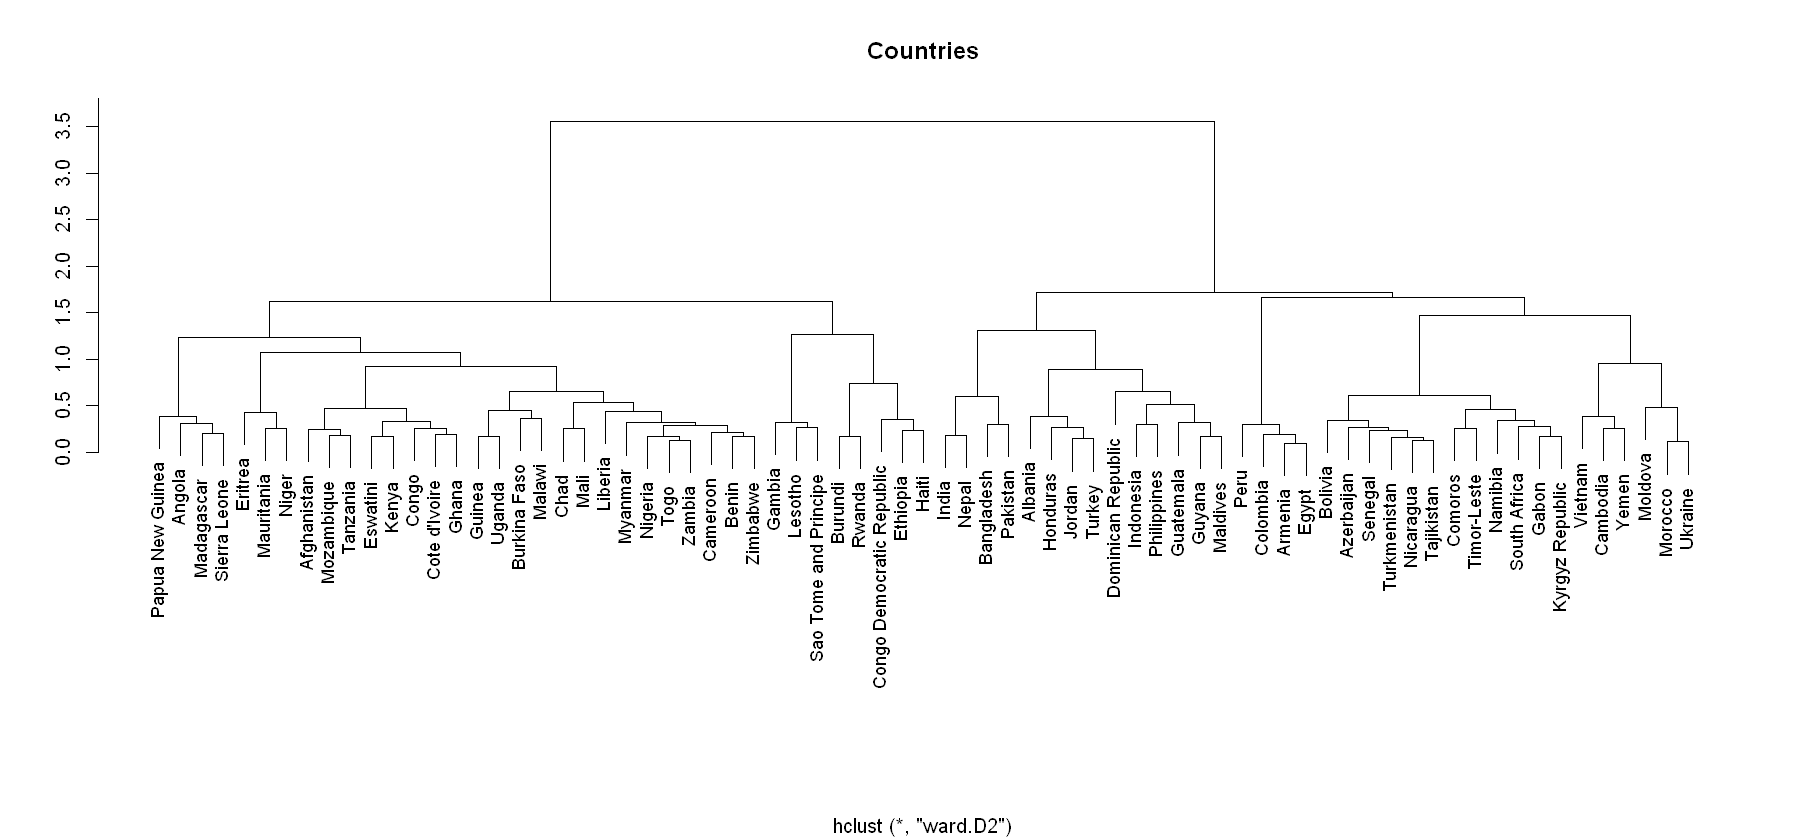

ERROR: Error in plot.xy(xy, type, ...): invalid graphics state


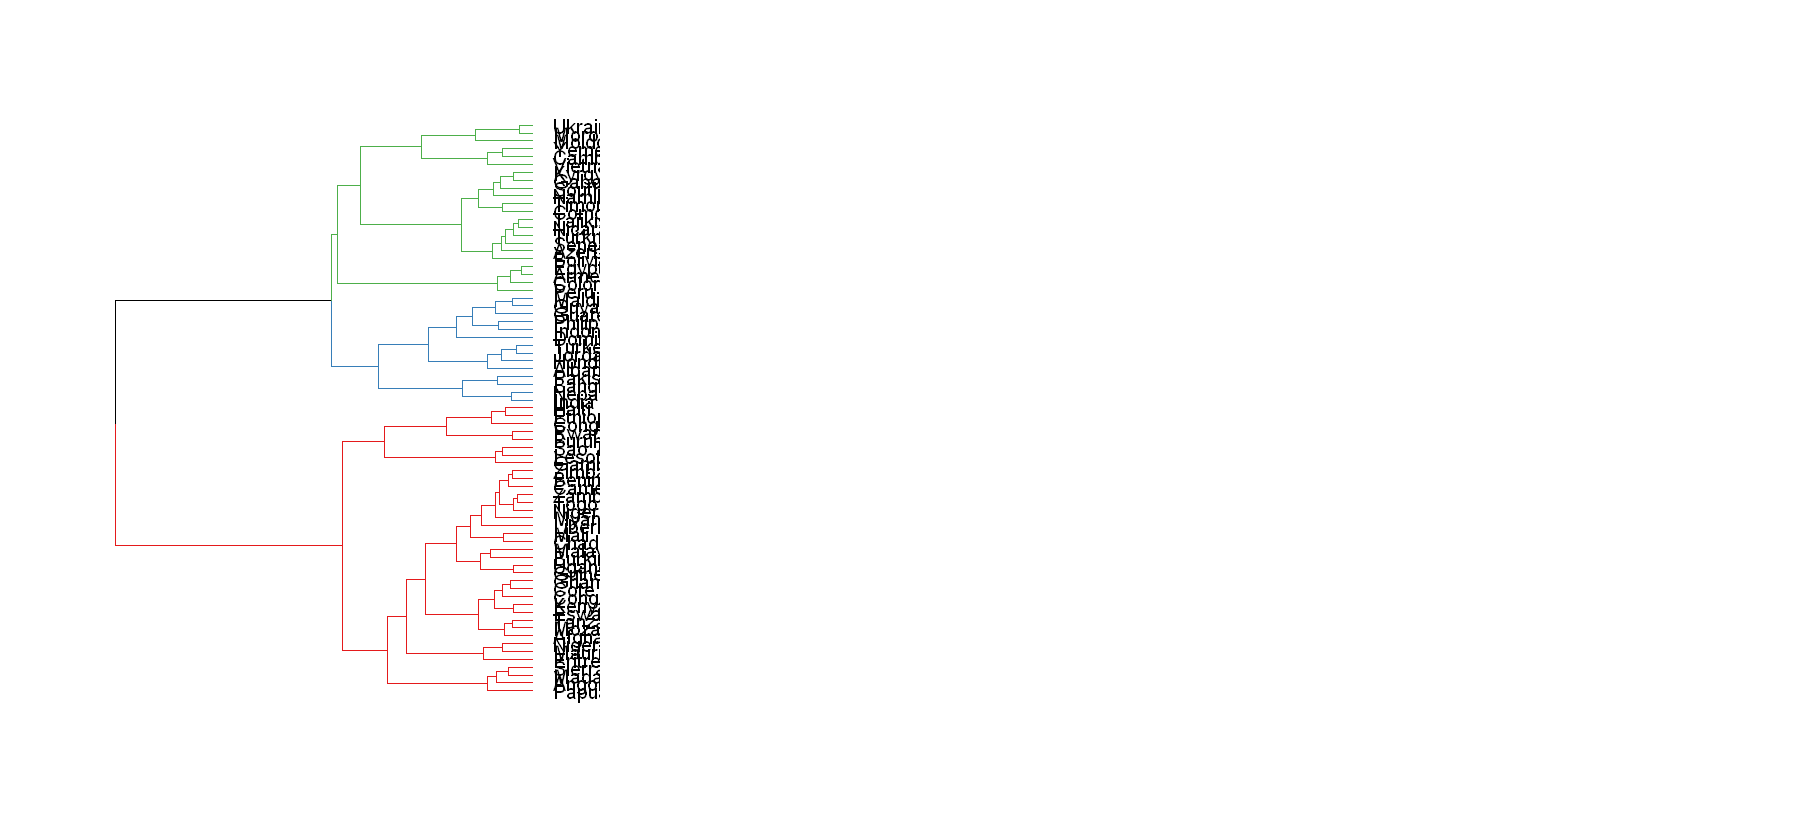

In [98]:
df.wa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)
head(df.wa,7)
summary(df.wa)
#Clustering using the optimal method
df <- df.wa[,c(2:8)]
hc.ward2=hclust(dist(df), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa$Country)

#optimal cuts
par(mar=c(1,1,1,1))
png(
  "optimal-clusters-ward-d2.png",
  width     = 5,
  height    = 5,
  units     = "in",
  res       = 700,
  #pointsize = 6
)

optimald2 = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = "alllong" ,alphaBeale = 0.1)

dev.off()

optimald = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'alllong',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'alllong',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "kmeans", index = 'alllong',alphaBeale = 0.1)

par(mar=c(1,1,1,1))
png(
  "optimal-clusters-wardd2.png",
  width     = 10,
  height    = 5,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
factoextra::fviz_nbclust(optimald2) + theme_minimal() + ggtitle("")
dev.off()


Due to low number of observation of 73 countries, we want to use 3 cuts to have a better clustering affects, and is the second best cutting option, where we will get to see better clustered results

# Best cut Insight & Wisdom

,row,col
Number_clusters,1,2
Number_clusters,1,4
Number_clusters,1,14
Number_clusters,1,15
Number_clusters,1,17
Number_clusters,1,20
Number_clusters,1,22


,CH,Duda,PseudoT2,Ratkowsky,Gap,McClain
Number_clusters,3.000,3.0000,3.000,3.0000,3.0000,3.0000
Value_Index,23.663,0.6357,11.461,0.3495,-0.9487,1.1244


,CH,Duda,Pseudot2,Ratkowsky,Gap,McClain
3,23.6630,0.6357,11.4610,0.3495,-0.9487,1.1244
4,20.7867,0.7694,10.4914,0.3334,-1.3367,1.2320
5,20.1583,0.5394,13.6622,0.3222,-1.5803,1.7228
6,19.9513,0.5828,8.5913,0.3092,-1.9398,1.9161
7,19.7964,0.3670,10.3472,0.3015,-2.2621,2.0245


png 
  2

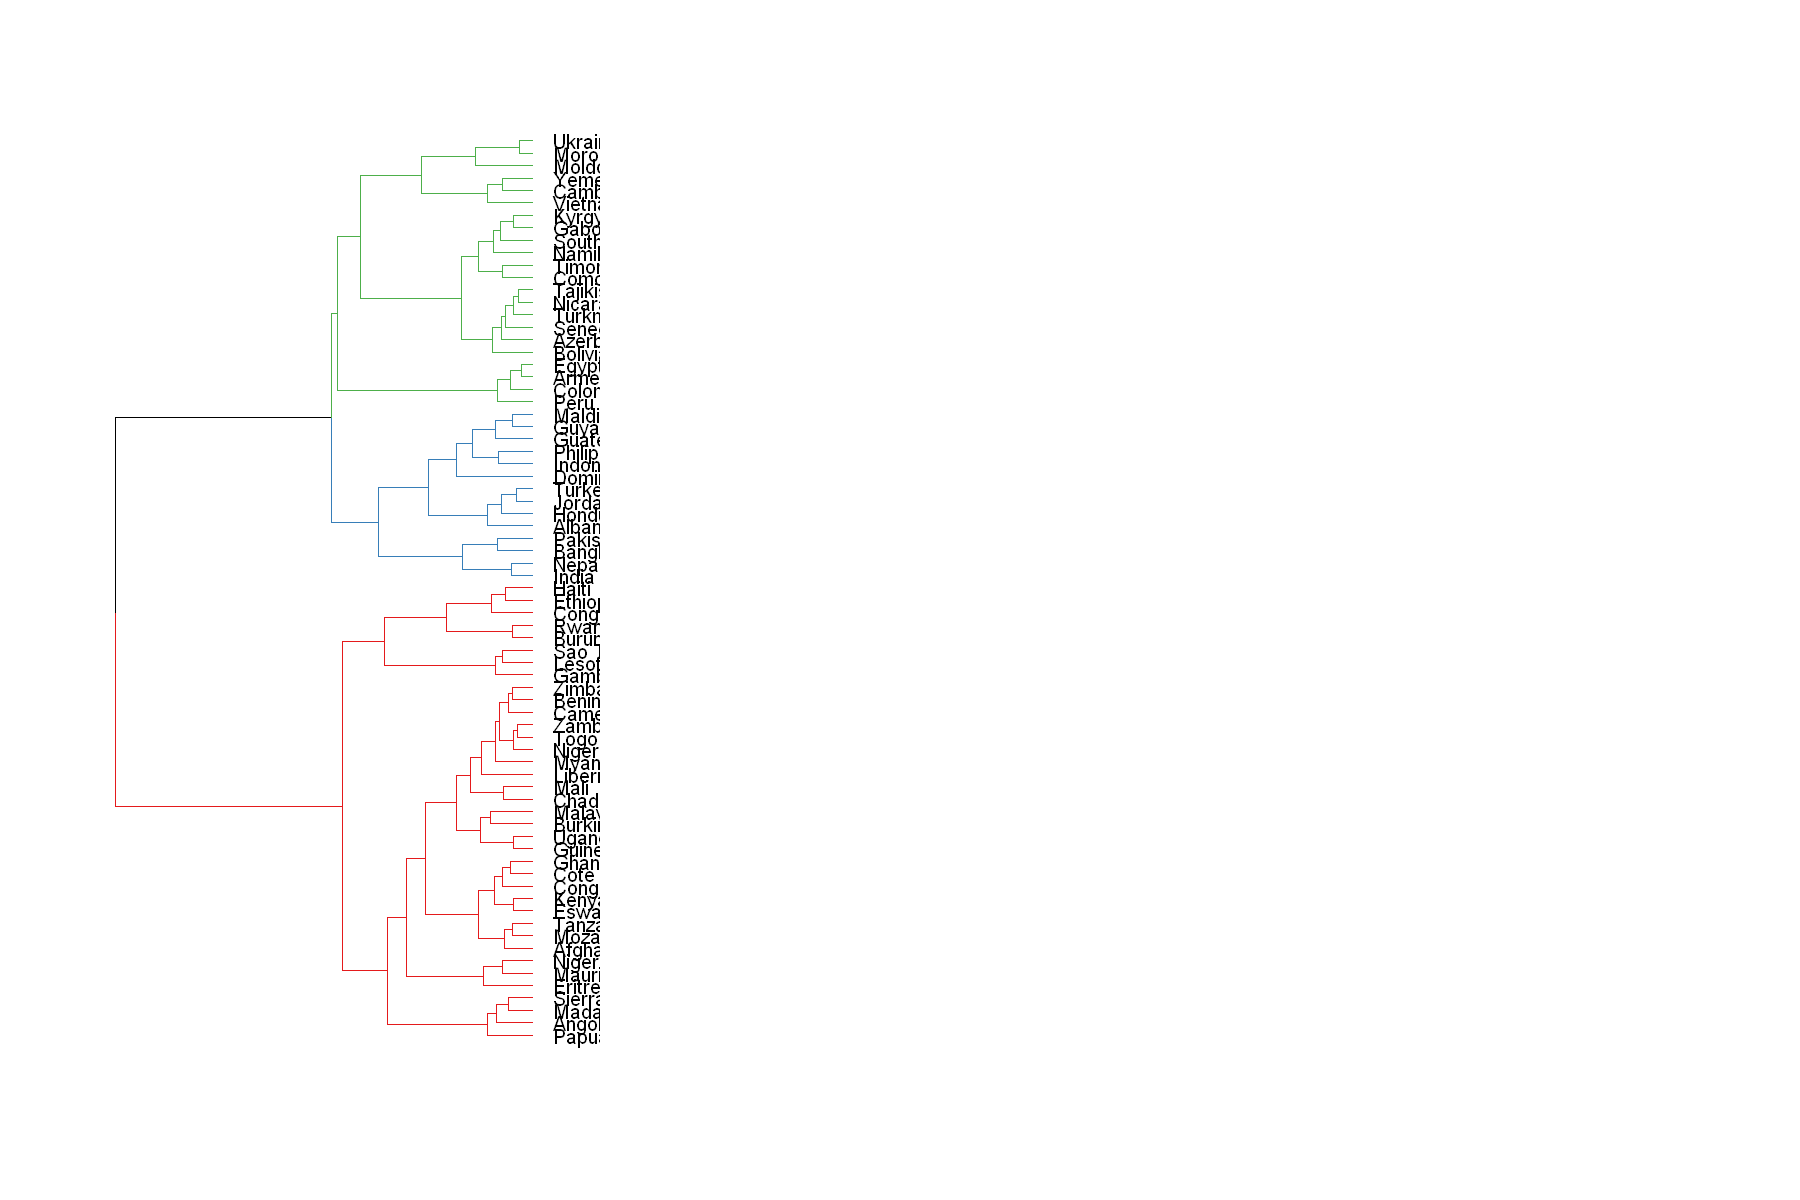

In [99]:
which(optimald2$Best.nc == 3, arr.ind=TRUE)
list(optimald2$Best.nc[,c(2,14,15,17,20,22)])
list(optimald2$All.index[,c(2,14,15,17,20,22)])

#sizing
options(repr.plot.width=15, repr.plot.height=10)
par(mar = c(7,7,7,10))

#Graph showing which is the optimal cuts
index <- optimald2$All.index[,c(14,17,22)]
par(mar=c(1,1,1,1))
png(
  "optimal-cuts.png",
  width     = 10,
  height    = 5,
  units     = "in",
  res       = 700,
  #pointsize = 6
)

pdf(file = "../../docs/manuscript/pdf-image/optimal-cuts.pdf"
  ,
  width     = 10,
  height    = 5 )


barplot(index, beside = TRUE, main = "",
        col = c( "green","yellow","orange","red","purple"),
        ylab = "Value Index", legend = c("3 clusters","4 clusters", "5 clusters", "6 clusters","7 clusters"),        
        args.legend = list(title = "Number of Clusters", cex = .7, x = "topleft", bty = "n",inset=c(0, 0) ))
dev.off()
# Duda - Smallest number of clusters such that index > criticalValue
# Ratkowsky - Maximum value of the index
#22. "mcclain" or "all" or "alllong" - Minimum value of the index

In [100]:
par(mar=c(1,1,1,1))
png(
  "gap-stat.png",
  width     = 10,
  height    = 10,
  units     = "in",
  res       = 700,
  #pointsize = 6
)

pdf(file = "../../docs/manuscript/pdf-image/gap-stat.pdf"
  ,
  width     = 10,
  height    = 10 )

set.seed(123)
gap_stat <- clusGap(df, hcut, hc_method ="ward.D2" ,
                   K.max = 7, B = 1000,  method = 'Tibs2001SEmax')
fviz_gap_stat(gap_stat)
dev.off()

png 
  2

# Dendrogram 

In [104]:
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
dfsimple[is.na(dfsimple)] <- 0
clusters.wa <- cutree(hc.ward2,3)     
dfsimple$clusters <- cutree(hc.ward2,3)
write_xlsx(dfsimple , '../../results/dfsimple.xlsx')

# Set1 easy to see'#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 6, name = "Set1") # Best color scheme is Set1 

dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=3, col = c('#984EA3','#377EB8', '#4DAF4A'))
labels(dend) <- df.wa$Country[hc.ward2$order]
#sizing
options(repr.plot.width=10, repr.plot.height=14)
par(mar = c(1,1,1,10))


png(
  "dendrogram.png",
  width     = 10,
  height    = 10,
  units     = "in",
  res       = 700,
  #pointsize = 6
)

dend %>% set("branches_k_color", 
             value = c('#E41A1C','#377EB8', '#4DAF4A'), k = 3) %>% plot(horiz = TRUE, axes = FALSE)   

dev.off()



[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33"

png 
  2

ERROR: Error in value[[3L]](cond): invalid graphics state


plot without title